# Initiation

In [ ]:
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Access Google Drive Folder
import os
os.chdir("/content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/")

In [ ]:
# Go to YOLOv8 root folder
%cd /content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/sidelobe

/content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/sidelobe


In [ ]:
# Install YOLOv8
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
%%writefile data.yaml
train: /content/gdrive/MyDrive/dataset2/noise1/GM2s/images/train
val: /content/gdrive/MyDrive/dataset2/noise1/GM2s/images/val
test: /content/gdrive/MyDrive/dataset2/noise1/GM2s/images/test
nc: 1
names: ['Ship']

Overwriting data.yaml


# Training Phase

In [ ]:
# Training Model biasa
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml workers=2 batch=12 imgsz=640 epochs=150 name=GM1-150

Ultralytics YOLOv8.2.24 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=150, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=GM1-150, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

In [ ]:
# continue training
!yolo detect train model=./runs/detect/GM1-150/weights/last.pt data=data.yaml resume=True

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/GM1-150/weights/last.pt, data=data.yaml, epochs=150, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=GM1-150, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/GM1-150/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False


# Validation Phase



In [ ]:
!yolo task=detect mode=val model=runs/detect/GM1-150/weights/best.pt name=GM1-150_val data=data.yaml

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/dataset2/noise1/GM2s/labels/val.cache... 92 images, 0 backgrounds, 0 corrupt: 100% 92/92 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:08<00:00,  1.41s/it]
                   all         92        169      0.969      0.915      0.973      0.765
Speed: 5.0ms preprocess, 12.6ms inference, 0.0ms loss, 27.5ms postprocess per image
Results saved to runs/detect/GM1-150_val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Testing Phase

In [ ]:
!yolo task=detect \
      mode=predict \
      model=runs/detect/GM1-100/weights/best.pt \
      source=/content/gdrive/MyDrive/dataset2/sea-clutters/images/test \
      imgsz=640 \
      name=test100-GM1_2 \
      hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/93 /content/gdrive/MyDrive/dataset2/sea-clutters/images/test/P0019_2400_3200_4800_5600.jpg: 640x640 1 Ship, 16.3ms
image 2/93 /content/gdrive/MyDrive/dataset2/sea-clutters/images/test/P0019_4800_5600_1200_2000.jpg: 640x640 1 Ship, 16.4ms
image 3/93 /content/gdrive/MyDrive/dataset2/sea-clutters/images/test/P0019_5660_6460_1200_2000.jpg: 640x640 (no detections), 16.3ms
image 4/93 /content/gdrive/MyDrive/dataset2/sea-clutters/images/test/P0020_2400_3200_4800_5600.jpg: 640x640 2 Ships, 16.3ms
image 5/93 /content/gdrive/MyDrive/dataset2/sea-clutters/images/test/P0020_3000_3800_4800_5600.jpg: 640x640 2 Ships, 16.3ms
image 6/93 /content/gdrive/MyDrive/dataset2/sea-clutters/image


image 1/1 /content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/P0016_0_800_8789_9589.jpg: 640x640 6 Ships, 16.4ms
Speed: 3.0ms preprocess, 16.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


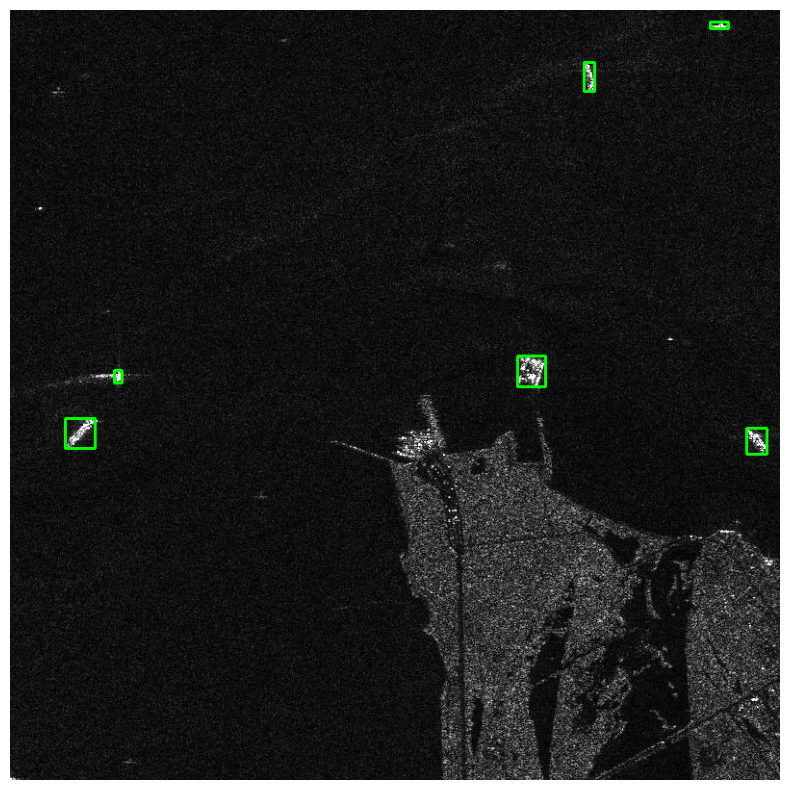

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Muat model yang sudah dilatih sebelumnya
model = YOLO('/content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/sidelobe/runs/detect/ORI-1002/weights/best.pt')

# Tentukan path ke file gambar
source = '/content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/P0016_0_800_8789_9589.jpg'

# Jalankan inferensi pada source
results = model(source)  # daftar objek Results

# Ambil gambar asli
image = cv2.imread(source)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ambil hasil deteksi
for result in results:
    boxes = result.boxes

    for box in boxes:
        # Ambil koordinat kotak deteksi
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Gambar kotak deteksi pada citra
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi tanpa label
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=6):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 20))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        if i == num_samples:
            break
        image = plt.imread(image_name)
        plt.subplot(2, 3, i+1)  # Change to 2x3 grid for 6 images
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
visualize('runs/detect/20s_test')

#ekstrak zip

In [ ]:
import zipfile
import os

# Mendefinisikan path file ZIP yang ingin diekstrak
zip_file_path = '/content/gdrive/MyDrive/dataset2/noise1/GM2s.zip'

# Mendefinisikan direktori tempat folder akan diekstrak
extract_folder_path = '/content/gdrive/MyDrive/dataset2/noise1'

# Mengekstrak folder dari file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print("Folder telah berhasil diekstrak.")

Folder telah berhasil diekstrak.


In [ ]:
%rm /content/gdrive/MyDrive/dataset2/noise2/GM2s.zip

In [ ]:
!rm -rf /content/gdrive/MyDrive/dataset2/wake-trail

In [ ]:
!rm /content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/wake_trai/GM1-100 /content/gdrive/MyDrive/Folder Eksperimen 405/APE-2/sea_clutters